In [1]:
#import libraries

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

In [36]:
df= pd.read_csv('movies.csv',encoding='latin-1')

In [37]:
# let us look at the data

df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [12]:
# now we will star cleaning out our data
#formatting our data

# checking missing data
#df.columns

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}- {}%'.format(col,pct_missing))

budget- 0.0%
company- 0.0%
country- 0.0%
director- 0.0%
genre- 0.0%
gross- 0.0%
name- 0.0%
rating- 0.0%
released- 0.0%
runtime- 0.0%
score- 0.0%
star- 0.0%
votes- 0.0%
writer- 0.0%
year- 0.0%


In [13]:
# Data types for our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [38]:
# changing the Data Type

df['budget']= df['budget'].astype('int64')

df['gross']= df['gross'].astype('int64')

In [39]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [16]:
# creating a new column year

df['yearcorrect']=df['released'].astype(str).str[:4]

In [40]:

df=df.sort_values(by=['gross'], inplace= False, ascending= False)

In [20]:
pd.set_option('display.max_rows', None)

In [21]:
# Drop any Duplicates

df['company'].drop_duplicates().sort_values(ascending= False)

5288                                          micro_scope
3486                                             i5 Films
6084                                                 erbp
3225                                       double A Films
2707                          Zucker Brothers Productions
1495                                   Zeta Entertainment
5905                                 Zentropa Productions
5917                        Zentropa International Norway
2742                              Zentropa Entertainments
329                                  Zenith Entertainment
4710                                      Zazen Produções
542                              Zanuck/Brown Productions
698                                   Zanuck Company, The
499                           Zacharias-Buhai Productions
4687                           Young Hannibal Productions
5084                                          Yellow Bird
4118                                       Yash Raj Films
4578          

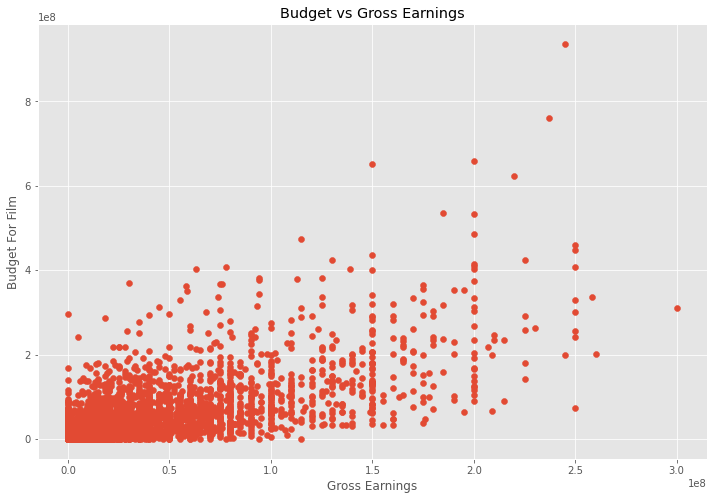

In [25]:
# Compairing Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.show()

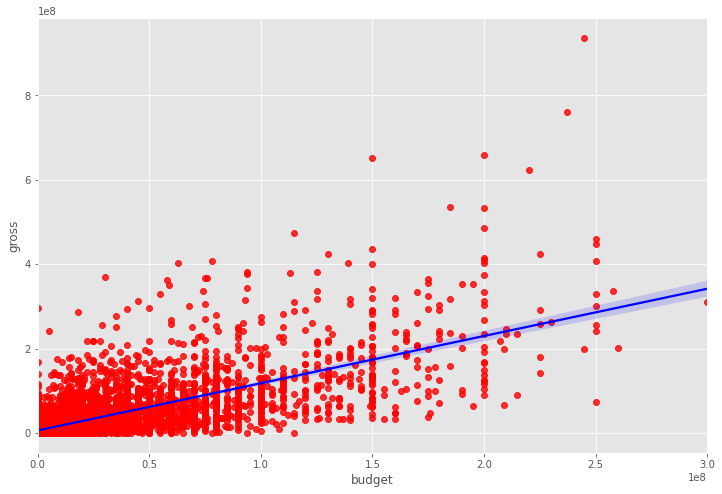

In [27]:
# Plot vs Gross using seaborn

sns.regplot(x= 'budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [28]:
# looking at correlation

df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


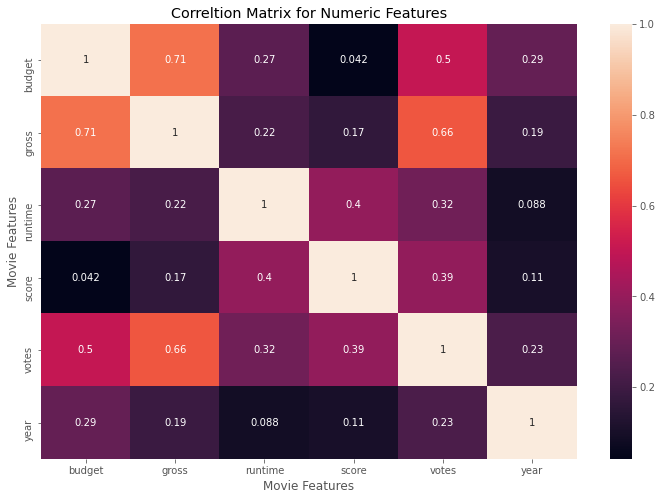

In [30]:
# HIGH Correlation between budget and gross

correlation_matrix= df.corr()

sns.heatmap(correlation_matrix, annot= True)
plt.title('Correltion Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [31]:
# Looks at Company
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [47]:
df_numerized= df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype== 'object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized.head()        

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012


In [41]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012


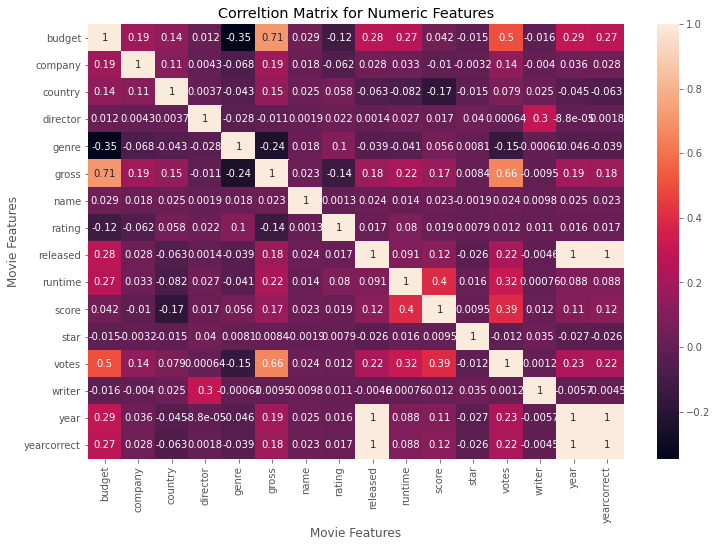

In [42]:
correlation_matrix= df_numerized.corr()

sns.heatmap(correlation_matrix, annot= True)
plt.title('Correltion Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [44]:
correlation_mat= df_numerized.corr()

corr_pairs= correlation_mat.unstack()

corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
             gross          0.712196
             name           0.028712
             rating        -0.119660
             released       0.276635
             runtime        0.268226
             score          0.042145
             star          -0.015061
             votes          0.503924
             writer        -0.015611
             year           0.291009
             yearcorrect    0.274820
company      budget         0.187205
             company        1.000000
             country        0.107950
             director       0.004320
             genre         -0.068330
             gross          0.187220
             name           0.018098
             rating        -0.062250
             released       0.027898
             runtime        0.033058
             score         -0.010426
 

In [45]:
sorted_pairs= corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
country      score         -0.174414
votes        genre         -0.150519
genre        votes         -0.150519
rating       gross         -0.135538
gross        rating        -0.135538
budget       rating        -0.119660
rating       budget        -0.119660
country      runtime       -0.081796
runtime      country       -0.081796
genre        company       -0.068330
company      genre         -0.068330
country      yearcorrect   -0.062707
yearcorrect  country       -0.062707
country      released      -0.062609
released     country       -0.062609
rating       company       -0.062250
company      rating        -0.062250
year         genre         -0.046259
genre        year          -0.046259
country      year          -0.045204
year         country       -0.045204
genre        country       -0.042793
c

In [46]:
high_corr= sorted_pairs[(sorted_pairs)>0.5]

high_corr

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
yearcorrect  year           0.996229
year         yearcorrect    0.996229
yearcorrect  released       0.999389
released     yearcorrect    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y

In [ ]:
# Votes and Budget have the highest correlation to gross earnings
#Company has low correlation